<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.A - Grafos </h2>
</center>
</p>
</div>

## Atributos

Un grafo está formado por dos elementos principales, vértices (Nodes) y aristas (Edges). 

Los elementos atómicos de un grafo son los vértices, representados gráficamente con puntos. En el siguiente ejemplo podemos observar cómo creamos un grafo con tres nodos con la función: `add_nodes_from`

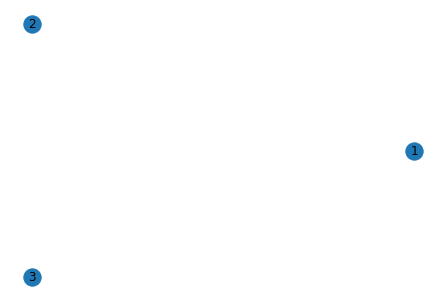

In [1]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
G.add_nodes_from((1,2,3))
nx.draw_circular(G, with_labels=True)

El otro atributo principal de un __grafo__ son las aristas (edges), estas son las conexiones entre todos nuestros nodos. En el siguiente ejemplo de código podemos ver como añadimos los vértices que van de 1 a 2 y de 1 a 3 sobre el grafo con 3 nodos del ejemplo anterior.  

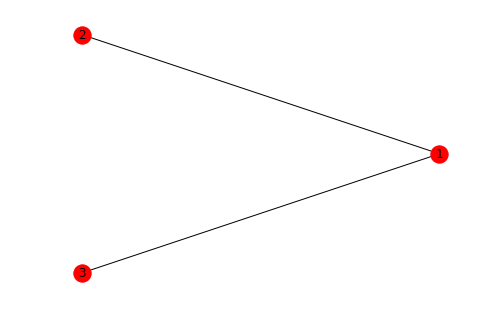

In [3]:
G.add_edges_from(((1,2), (1,3)))
nx.draw_circular(G, with_labels=True)

## Tipos de grafos

Hay diferentes tipos de grafos en función de sus características, en esta introducción destacaremos tres tipos:

- Grafos dirigidos, las aristas tienen direccion
- Grafos inconexos, los que no estan conectados a ningun nodo
- Grafos regulares , los que tienen totos el mismo grado

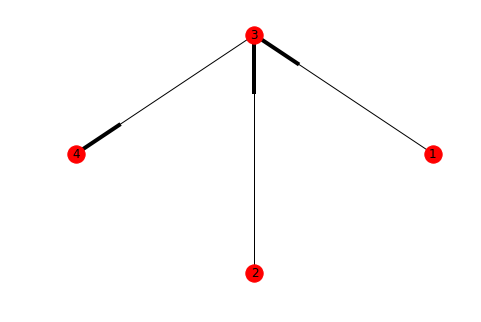

In [4]:
# Grafo dirigido:
# - Las aristas tienen dirección
DG = nx.DiGraph()
DG.add_edges_from(((1,3), (3,4), (2,3)))
nx.draw_circular(DG, with_labels=True)

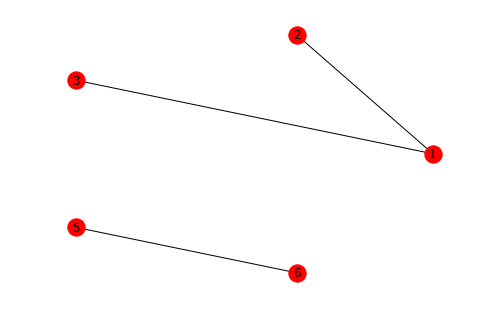

In [5]:
# Grafo inconexo no dirigido
# - Partiendo de un nodo cualquiera no se puede llegar a recorrer todo el grafo
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,3), (5,6)))
nx.draw_circular(UG, with_labels=True)

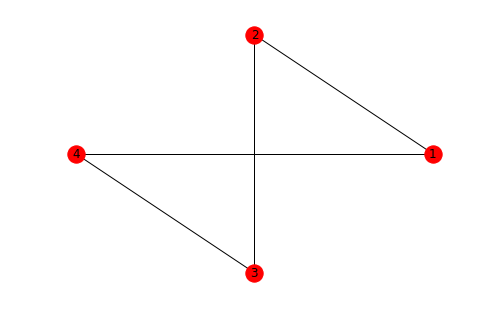

In [6]:
# Grafo regular no dirigido
# - Todos los nodos tienen el mismo grado
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3)))
nx.draw_circular(UG, with_labels=True)

## Propiedades

- __Orden__ de un grafo: El orden de un grafo es el número de vértices que contiene.
- __Grado__ de un vértice: Número de aristas que conectan con un vértice (en el caso de grafos dirigidos hablaríamos de grado de entrada y de salida).

<div class="alert alert-danger">
<h1>Ejercicio</h1>
<p><strong>
Con la información de la que disponemos, tenéis que crear un gráfo de orden 5 en el que el grado de todos y cada uno de los vértices sea 4.
</strong></p>
</div>

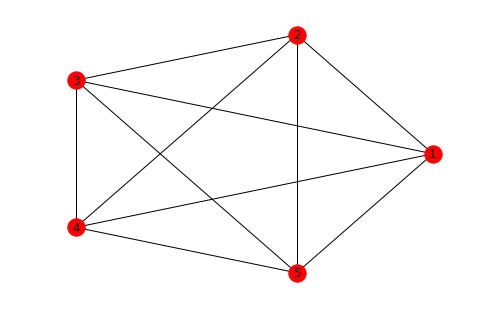

In [7]:
# Ejercicio 1
#Orden 5 implica 5 nodos
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,3),(1,4),(1,5), (2,1),(2,3), (2,4),(2,5), (3,1),(3,2),(3,4),(5,3),(5,4)))
nx.draw_circular(UG, with_labels=True)

En el ejercicio anterior hemos dibujado lo que se llama un __grafo completo__. Este tipo de grafos se caracterizan porque todos los vértices están enlazados entre ellos.

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
En un gráfo completo de orden 4, ¿cuántas aristas existen? ¿Y en un grafo completo de orden $n$?
</strong></p>
</div>

Tendrian 6 aristas.

En caso de grado n seria (n*n-1)/2

# Algoritmos sobre grafos
## Minimum Path


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0- Random Walk</p></h2>
  
  <p>
  La implementación de un algoritmo de random walk es, en este caso, un poco ingenua, ya que la utilizaremos para encontrar un camino entre dos puntos (no hace falta que sea el más corto). 
  </p>
  <p>
  Para el desarrollo de este algoritmo lo único que necesitamos es un nodo inicial y un nodo final. En cada iteración del algoritmo iremos visitando un nodo aleatorio de entre todos los posibles vecinos. El parámetro `repeat` determinará si un nodo que ya ha sido visitado puede volver a ser visitado de nuevo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__repeat__: Booleano indicando si nodos se pueden visitar mas de una vez o no.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [9]:
import random
def random_walk(G, origen, destino, repeat=False):
    path = [origen]
    expanded = 0 
    ra = random.choice(list(G.neighbors(origen))) #Eleccio aleatoria d'un node 
    current = ra
    
    while destino not in G.neighbors(current):#Mentre el desti final no sigui vei del node actual
        if current not in path: #Si l'actual no esta a la lista de paths
            path.append(current) #Afegim el node actual al dels camins
            expanded+=1 #Sumem 1 al comptador
            
        
        while ra in path:#Si trobem el mateix node repetit tornem a buscar un nou node.
            ra = random.choice(list(G.neighbors(current)))
    
        current = ra
        
    if destino is not origen: #Si el desti no es l'origen 
        path.append(destino) #Afegim al path el desti
        expanded+=1
    
    return {
        'path' : path,
        'expanded' : expanded
    }

In [10]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(100, 2) # Genera un grafo aleatorio
random_walk(G, 1, 95)

KeyboardInterrupt: 

In [3]:
def random_walk(G, orien, destino, repeat = False):
    path = [origin]
    visited = [n: False for n in G.nodes]
    expanded = 0
    
    while path[-1] is not destino:
        visited[àth[-1]] = True
        
        neighbors = [n for n in G.neighbors(path[-1]) if repeat or not visited]
        if not neighbors:break
        path.append(choice(neighbors))
        expanded+=1
        
    return{
        path,expanded
    }

SyntaxError: invalid syntax (<ipython-input-3-699eb4066300>, line 3)

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Es posible encontrar siempre un camino?
</strong></p>
</div>

Si es conex i no es repeteixen no pot tenir cami

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Modifica el algoritmo para ir dejando "<i>migas de pan</i>" en los nodos visitados, es decir, incrementa en uno un contador de veces visitado cada vez que se visita el nodo.
</strong></p>
</div>

In [ ]:
def random_walk_breadcrumbs(G, origen, desti, )
    path = [origin]
    visited = [n: False for n in G.nodes]
    expanded = 0
    
    while path[-1] is not destino:
        visited[àth[-1]] = True
        
        neighbors = [n for n in G.neighbors(path[-1]) if repeat or not visited]
        if not neighbors:break
        path.append(choice(neighbors))
        expanded+=1
        
    return{
        path,expanded
    }


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo <i>Breadth First Search</i> visto en clase. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una cola realizemos una exploración expansiva. Es importante controlar que se trata de un grafo genérico, y no de un arbol, por lo que un mismo nodo nos lo podemos encontrar en varios niveles. En otras palabras, el grafo podría tener ciclos, controlad que cada nodo se visite una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [7]:
from queue import Queue

def bfs(G, origen, destino): 
    explored=[] #Llista pels explorats
    queue = [[origen]] #Array per la cua começant per l'origen
    expanded = 0 #Parametre per saber quant s'ha expandit
    
    while queue:
        path = queue.pop(0) #Posem al cami el primer element, l'origen
        node = path[-1]#Agafem l'ultim element
        
        if node not in explored: #Si el node no esta a la llista de explorats
            neighbours = G[node] #Afegim el node al dicc de veins

            for neighbour in neighbours: #Iterem pels veins
                nPath = list(path) #creem una llista amb el path
                nPath.append(neighbour) #Afegim al path el vei
                queue.append(nPath) #Afegim a la cua el element del path
                if neighbour == destino: #Si el vei es el desti
                    expanded = len(path) #Agafem la longitud del path que ens diu cuants nodes ha visitat
                    return { #retornem el cami i la expansio
                            'path' : nPath,
                            'expanded' : expanded                

                }
            path.append(node)#Si el node esta explorat l'afegim a la llista del cami
        
    
 

In [8]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(10, 2)
nx.draw_circular(G, with_labels=True)

bfs(G, 1, 8)

{'expanded': 4, 'path': [1, 2, 0, 5, 8]}

In [11]:
from queue import Queue

def bfs(G,origen, destino):
    visited, queue= set(),Queue()
    queue.put(origen)
    expanded = 0
    parent = {origen:None}
    #Explorar el grafo
    while not queue.empty():
        node = queue.get() #Extraemos el elemento que mas tiempo lleva en la cola
        if node == destino: break
        if node not in visited:
            visited.add(node)
            expanded+=1
            for n in G.neighbors(node):
                if n in visited: continue #Evitamos ciclos
                queue.put(n) 
                parent[n] = node # Para cada nodo, nos acordamos desde donde ha llegado
    #Reconstruir camino
    node = destino
    path = [node]
    while node != origen:
        node = parent[node]
        path.append(node)
    path.reverse() # Path[:-1]
    
    return { #retornem el cami i la expansio
        'path' : path,
        'expanded' : expanded                

    }

In [12]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(10, 2)
nx.draw_circular(G, with_labels=True)

bfs(G, 1, 8)

{'expanded': 5, 'path': [1, 2, 3, 4, 8]}